### USABLE AI PROJECT : GEO-LOCATE

Team Members

Vishwa Shrirame (vshriram@iu.edu)   
Sushant Kotwal (skotwal@iu.edu)

Importing required libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tweepy
import pandas as pd
import json
import os
import glob
import csv
import dateutil.parser
import unicodedata
from datetime import datetime
import s3fs
import requests
import time
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',None,'display.max_rows',None)

### Data Extraction/Execution

In [ ]:
def get_twitter_client():
    access_key = "<ACCESS_KEY>"
    access_secret = "<ACCESS_KEY_SECRET>"
    consumer_key = "<CONSUMER_KEY>"
    consumer_secret = "<CONSUMER_KEY_SECRET>"
    bearer_token = "<BEARER_TOKEN>"

    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_key, access_secret)

    client = tweepy.Client(bearer_token, 
                            consumer_key, 
                            consumer_secret, 
                            access_key, 
                            access_secret, 
                            return_type = dict, 
                            wait_on_rate_limit=True)

    api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())
    return client, api

def get_clubs(league_file):

    with open('../resources/text/'+ league_file + '.txt', 'r', encoding='utf-8') as f:
        text = f.readlines()
        clubs_str = ''.join(text)

    clubs = []
    for club in clubs_str.split(", "):
        clubs.append(club)
    return clubs

def get_tweets(n_tweets, client, api, league_file):
    
    clubs = get_clubs(league_file)
    resource_path = '../resources/'
    csv_list=[]
    df_merged = pd.DataFrame()

    for club in clubs:

        tweets = api.search_tweets(
                                    q =  club,
                                    include_ext_edit_control=True,
                                    tweet_mode = 'extended',
                                    count = n_tweets,
                                    lang = 'en',
                                    include_entities = False
        )
        with open(resource_path + 'json/' + league_file + '/' + club + '.json', 'w', encoding='utf-8') as f:
            json.dump(tweets['statuses'], f, ensure_ascii=False, indent=4)
            
        with open(resource_path + 'json/' + league_file + '/' + club + '.json', 'r', encoding='utf-8') as f:
            data = json.loads(f.read())

        df = pd.json_normalize(data)
        df_csv = df.to_csv(resource_path + 'csv/' + league_file + '/' + club + '.csv', encoding='utf-8', index = False)
        csv_list.append(club + '.csv')

    file_path = resource_path + 'csv/' + league_file + '/' 
    file_list = os.listdir(file_path)
    file_list.sort()


    for file in file_list:
            df_temp = pd.read_csv(resource_path + 'csv/' + league_file + '/' + file)
            df_temp['Club_Name'] = file.split('.')[0]
            df_merged = pd.concat([df_merged,df_temp],ignore_index=True)


    df_merged.to_csv(resource_path + 'csv/' + league_file + '/' + 'df_merged.csv', encoding='utf-8', index = False)


def main():
    
    client, api = get_twitter_client()
    league_file = 'plclubs'
    n_tweets = 50
    get_tweets(n_tweets, client, api, league_file)


if __name__ == "__main__":
    main()

Notebook Stuff

In [1]:
import pandas as pd

In [13]:
merged = pd.read_csv('../resources/csv/plclubs/df_merged.csv', dtype='unicode')

In [14]:
merged.head(10)

,created_at,id,id_str,full_text,truncated,display_text_range,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,quoted_status.place.full_name,quoted_status.place.country_code,quoted_status.place.country,quoted_status.place.contained_within,quoted_status.place.bounding_box.type,quoted_status.place.bounding_box.coordinates,geo.type,geo.coordinates,coordinates.type,coordinates.coordinates
0,Fri Mar 03 05:10:16 +0000 2023,1631522357599952897,1631522357599952897,@scarlet_arsenal Here it is. 🤣 https://t.co/ze...,False,"[17, 30]","<a href=""http://twitter.com/download/iphone"" r...",1.6315216450338202e+18,1631521645033820161,1.3031816513467802e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fri Mar 03 05:09:59 +0000 2023,1631522284845293568,1631522284845293568,AUSUME!!!! i am contacting my cock and I’m the...,False,"[0, 88]","<a href=""https://twitter.com/spicycopypastas"" ...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fri Mar 03 05:09:42 +0000 2023,1631522214666223616,1631522214666223616,@Arsenal U dont need to show your enemy your n...,False,"[9, 54]","<a href=""http://twitter.com/download/android"" ...",1.6313461290184458e+18,1631346129018445824,34613288.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fri Mar 03 05:09:34 +0000 2023,1631522178976956417,1631522178976956417,"Man Utd face Liverpool test, Arsenal back in t...",False,"[0, 98]","<a href=""https://nairobitimes.co.ke/"" rel=""nof...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fri Mar 03 05:09:29 +0000 2023,1631522157862821890,1631522157862821890,"@YkeeBenda Arsenal die hard, love u ykee",False,"[11, 40]","<a href=""http://twitter.com/download/android"" ...",1.6310393766826312e+18,1631039376682631168,2272927180.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Fri Mar 03 05:09:22 +0000 2023,1631522130969108485,1631522130969108485,@SkySportsPL Where's Arteta? Retaining 5 pts o...,False,"[13, 120]","<a href=""http://twitter.com/download/android"" ...",1.6312630900787937e+18,1631263090078793729,713993413.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Fri Mar 03 05:09:05 +0000 2023,1631522057769955328,1631522057769955328,@0xColliman @Arsenal @Deb_236 @biel_m04 @Bukay...,False,"[54, 123]","<a href=""http://twitter.com/download/android"" ...",1.6314429917588357e+18,1631442991758835714,1.346143286571004e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Fri Mar 03 05:08:54 +0000 2023,1631522013427769345,1631522013427769345,The rest didn't concern me until he talked abo...,False,"[0, 58]","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Fri Mar 03 05:08:50 +0000 2023,1631521995908104192,1631521995908104192,@chaplinez70 Charles leave Dem ooo. Which leag...,False,"[13, 106]","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.6312202088818606e+18,1631220208881860608,139301178.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Fri Mar 03 05:08:39 +0000 2023,1631521947732398080,1631521947732398080,@IsaacWalter14 @EmiratesFACup @agarnacho7 @Man...,False,"[50, 150]","<a href=""http://twitter.com/download/android"" ...",1.631368779740373e+18,1631368779740373017,4672647799.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
merged['Club_Name'].value_counts()

df_merged                  1000
Liverpool                    50
Wolverhampton Wanderers      50
West Ham United              50
Tottenham Hotspur            50
Southampton                  50
Nottingham Forest            50
Newcastle United             50
Manchester United            50
Manchester City              50
Arsenal                      50
Aston Villa                  50
Leeds United                 50
Fulham                       50
Everton                      50
Crystal Palace               50
Chelsea                      50
Brighton & Hove Albion       50
Brentford                    50
Bournemouth                  50
Leicester City               50
Name: Club_Name, dtype: int64

In [117]:
mufc = pd.read_csv('../resources/csv/plclubs/Manchester United.csv')

In [118]:
merged.shape

(1000, 316)

In [119]:
mufc.shape

(50, 138)

### Data Cleaning

In [120]:
def dropping_cols(df):

    df.dropna(axis=1, inplace=True, how='all') # drop cols with all NANs
    
    for column in df.columns:
        if "in_reply_to" in column:
            df.drop(column, inplace=True, axis = 1)
        elif "user.entities" in column:
            df.drop(column, inplace=True, axis = 1)
        elif "profile" in column:
            df.drop(column, inplace=True, axis = 1)
        elif "quoted_status" in column:
            df.drop(column, inplace=True, axis = 1)
        elif "withheld_in_countries" in column:
            df.drop(column, inplace=True, axis = 1)
        elif "id_str" in column:
            df.drop(column, inplace=True, axis = 1)
        elif "is_translator" in column:
            df.drop(column, inplace=True, axis = 1)
        elif "is_translation_enabled" in column:
            df.drop(column, inplace=True, axis = 1)
        elif "translator_type" in column:
            df.drop(column, inplace=True, axis = 1)
    
    return df

In [121]:
mufc_n = mufc.copy()
mufc_n = dropping_cols(mufc_n) # dropping unnecessary columns
columns_to_use = mufc_n.columns.to_list() # we will be making use of only these set of columns
columns_to_use.append('Club_Name')

In [122]:
def data_cleaning(merged):
    
    new_merged_df = merged[columns_to_use]
    
    retweeted_status_cols=[]
    other_columns=[]
    for i in new_merged_df.columns:
        if 'retweeted_status' in i:
            retweeted_status_cols.append(i)
        else:
            other_columns.append(i)
    retweeted_status_cols.append('Club_Name')

    other_columns.pop(-1)
    retweet_status_df  = new_merged_df[retweeted_status_cols]

    retweet_columns_keep = ['retweeted_status.created_at','retweeted_status.id','retweeted_status.full_text','retweeted_status.source','retweeted_status.user.id','retweeted_status.user.name','retweeted_status.user.screen_name','retweeted_status.user.location','retweeted_status.user.description','retweeted_status.user.followers_count',
    'retweeted_status.user.friends_count','retweeted_status.user.listed_count','retweeted_status.user.verified', 'retweeted_status.retweet_count','retweeted_status.user.geo_enabled','retweeted_status.lang',
    'retweeted_status.favorite_count','Club_Name']
    
    total_columns = other_columns + retweet_columns_keep
    merged_df_new_cols = merged[total_columns]

    return merged_df_new_cols    

In [123]:
merged_df_new_cols = data_cleaning(merged)

In [124]:
merged_df_new_cols.head()

,created_at,id,full_text,truncated,display_text_range,source,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,metadata.iso_language_code,metadata.result_type,user.id,user.name,user.screen_name,user.location,user.description,user.url,user.protected,user.followers_count,user.friends_count,user.listed_count,user.created_at,user.favourites_count,user.geo_enabled,user.verified,user.statuses_count,user.contributors_enabled,user.following,user.follow_request_sent,user.notifications,possibly_sensitive,retweeted_status.created_at,retweeted_status.id,retweeted_status.full_text,retweeted_status.source,retweeted_status.user.id,retweeted_status.user.name,retweeted_status.user.screen_name,retweeted_status.user.location,retweeted_status.user.description,retweeted_status.user.followers_count,retweeted_status.user.friends_count,retweeted_status.user.listed_count,retweeted_status.user.verified,retweeted_status.retweet_count,retweeted_status.user.geo_enabled,retweeted_status.lang,retweeted_status.favorite_count,Club_Name
0,Thu Feb 23 04:23:05 +0000 2023,1628611377534320640,"RT @MilanPosts: 🗣️ Jorginho: ""Tottenham? Forza...",False,"[0, 114]","<a href=""http://twitter.com/download/iphone"" r...",False,217,0,False,False,en,en,recent,432938298,titsass soccerhockey,itaninog,Canada,NaN,NaN,False,4995,217,26,Fri Dec 09 23:29:30 +0000 2011,19266,False,False,160692,False,False,False,False,True,Tue Feb 21 12:10:06 +0000 2023,1.628004e+18,"🗣️ Jorginho: ""Tottenham? Forza Milan! All Arse...","<a href=""http://twitter.com/download/iphone"" r...",3.014436e+09,Milan Posts 🏆🇮🇹,MilanPosts,"Milan, Lombardie","Welcome to Milan Posts, your Twitter source📱 •...",177168.0,316.0,768.0,False,217.0,True,en,3370.0,Arsenal
1,Thu Feb 23 04:22:49 +0000 2023,1628611309951492096,@AnfieldEdition @johncrossmirror Let him resig...,False,"[33, 139]","<a href=""http://twitter.com/download/iphone"" r...",False,0,0,False,False,en,en,recent,1136914773008932864,kibirige franko,FrankoKibirige,Nalubega complex,"Home of computers,laptops,cctv cameras,smartph...",NaN,False,25,231,0,Fri Jun 07 08:36:19 +0000 2019,7,False,False,522,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arsenal
2,Thu Feb 23 04:22:48 +0000 2023,1628611307510419458,"@emeka_wosu @centredevils Make you just wait, ...",False,"[26, 138]","<a href=""http://twitter.com/download/iphone"" r...",False,0,0,False,False,en,en,recent,4830688761,kesena Ochia,KesenaOchia,NaN,Son Of The Most High || Born As The Answer To ...,NaN,False,60,195,0,Wed Jan 20 20:40:24 +0000 2016,669,False,False,767,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arsenal
3,Thu Feb 23 04:22:47 +0000 2023,1628611302049345538,RT @LatteFirm: This. Is. Tremendous. The edit....,False,"[0, 104]","<a href=""http://twitter.com/download/iphone"" r...",False,1551,0,False,False,en,en,recent,877568968416006144,Ryan,AFCRRE,NaN,NaN,NaN,False,513,1250,4,Wed Jun 21 16:48:41 +0000 2017,92997,False,False,32843,False,False,False,False,False,Wed Feb 22 20:03:10 +0000 2023,1.628486e+18,This. Is. Tremendous. The edit. The soundtrack...,"<a href=""http://twitter.com/download/iphone"" r...",1.362995e+18,Latte Firm,LatteFirm,Arsenal,🔴⚪️ #Breakdowns | #LateNightLatte | Post-match...,18743.0,47.0,236.0,False,1551.0,False,en,7849.0,Arsenal
4,Thu Feb 23 04:22:45 +0000 2023,1628611294889709568,@ArsenalBuzzCom Chelsea is not a big club but ...,False,"[16, 294]","<a href=""http://twitter.com/download/android"" ...",False,0,0,False,False,en,en,recent,1485360316510789634,Prince of Osun💚,Teeprince22,NaN,Strong and Bold but not VULNERABLE,NaN,False,43,142,0,Sun Jan 23 21:14:45 +0000 2022,217,True,False,1248,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arsenal


In [126]:
def remove_fill_nulls(merged_df_new_cols):
    merged_df_new_cols['user.location'] = merged_df_new_cols['user.location'].fillna('No Loctation Information')
    merged_df_new_cols['retweeted_status.user.location'] = np.where(merged_df_new_cols['retweeted_status.created_at'].notnull(), 'No Location for Retweeted User', merged_df_new_cols['retweeted_status.user.location'])
    merged_df_new_cols['retweeted_status.user.description'] = np.where(merged_df_new_cols['retweeted_status.created_at'].notnull(), 'No Description for Retweeted User', merged_df_new_cols['retweeted_status.user.description'])
    merged_df_new_cols['retweeted_status.created_at'] = merged_df_new_cols['retweeted_status.created_at'].fillna('No Retweet')
    merged_df_new_cols['retweeted_status.id'] = merged_df_new_cols['retweeted_status.id'].fillna('No Retweet')
    merged_df_new_cols['retweeted_status.full_text'] = merged_df_new_cols['retweeted_status.full_text'].fillna('No Retweet')
    merged_df_new_cols['retweeted_status.source'] = merged_df_new_cols['retweeted_status.source'].fillna('No Retweet')
    merged_df_new_cols['retweeted_status.user.id'] = merged_df_new_cols['retweeted_status.user.id'].fillna('No Retweet')
    merged_df_new_cols['retweeted_status.user.screen_name'] = merged_df_new_cols['retweeted_status.user.screen_name'].fillna('No Retweet')
    merged_df_new_cols['retweeted_status.user.location'] = merged_df_new_cols['retweeted_status.user.location'].fillna('No Retweet')
    merged_df_new_cols['retweeted_status.user.description'] = merged_df_new_cols['retweeted_status.user.description'].fillna('No Retweet')
    merged_df_new_cols['retweeted_status.user.followers_count'] = merged_df_new_cols['retweeted_status.user.followers_count'].fillna('No Retweet')
    merged_df_new_cols['retweeted_status.user.friends_count'] = merged_df_new_cols['retweeted_status.user.friends_count'].fillna('No Retweet')
    merged_df_new_cols['retweeted_status.user.listed_count'] = merged_df_new_cols['retweeted_status.user.listed_count'].fillna('No Retweet')
    merged_df_new_cols['retweeted_status.user.verified'] = merged_df_new_cols['retweeted_status.user.verified'].fillna('No Retweet')
    merged_df_new_cols['retweeted_status.retweet_count'] = merged_df_new_cols['retweeted_status.retweet_count'].fillna('No Retweet')
    merged_df_new_cols['retweeted_status.user.geo_enabled'] = merged_df_new_cols['retweeted_status.user.geo_enabled'].fillna('No Retweet')
    merged_df_new_cols['retweeted_status.lang'] = merged_df_new_cols['retweeted_status.lang'].fillna('No Retweet')
    merged_df_new_cols['retweeted_status.favorite_count'] = merged_df_new_cols['retweeted_status.favorite_count'].fillna('No Retweet')
    merged_df_new_cols['retweeted_status.user.name'] = merged_df_new_cols['retweeted_status.user.name'].fillna('No Retweet')
    merged_df_new_cols['user.description'] = merged_df_new_cols['user.description'].fillna('No Description Available')
    merged_df_new_cols = merged_df_new_cols.drop(['user.url','possibly_sensitive'],axis=1)

    return merged_df_new_cols

In [127]:
merged_df_new_cols_nn = remove_fill_nulls(merged_df_new_cols)

In [129]:
merged = merged_df_new_cols_nn

## Data Analysis

In [130]:
numerical_cols = merged[['retweet_count', 'favorite_count', 'user.followers_count', 'user.listed_count', 'user.favourites_count', 'user.friends_count']]

In [131]:
numerical_cols.describe()

,retweet_count,favorite_count,user.followers_count,user.listed_count,user.favourites_count,user.friends_count
count,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.00000
mean,250.884000,0.606000,6.447774e+03,26.038000,46200.490000,1307.05500
std,1234.962825,5.566305,5.871173e+04,156.342546,103482.577785,2853.44608
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.00000
25%,0.000000,0.000000,9.100000e+01,0.000000,923.000000,161.25000
50%,4.000000,0.000000,4.060000e+02,1.000000,8936.000000,550.00000
75%,69.000000,0.000000,1.223000e+03,5.000000,46079.000000,1620.00000
max,30656.000000,97.000000,1.053157e+06,2679.000000,704689.000000,44061.00000


In [15]:
mufc_numerical_cols = mufc[['retweet_count', 'favorite_count', 'user.followers_count', 'user.listed_count', 'user.favourites_count', 'user.friends_count']]

In [16]:
mufc_numerical_cols.describe()

,retweet_count,favorite_count,user.followers_count,user.listed_count,user.favourites_count,user.friends_count
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,430.820000,0.020000,4989.160000,1.720000,51089.080000,3374.340000
std,1238.594359,0.141421,16546.380653,4.347366,72017.819838,9055.493693
min,0.000000,0.000000,3.000000,0.000000,0.000000,63.000000
25%,1.250000,0.000000,50.250000,0.000000,6772.250000,155.250000
50%,59.500000,0.000000,277.000000,0.000000,18578.500000,376.000000
75%,325.000000,0.000000,937.000000,1.000000,68182.000000,2046.000000
max,7803.000000,1.000000,81967.000000,27.000000,371588.000000,44061.000000


In [32]:
mufc_n.iloc[[mufc_n['retweeted_status.favorite_count'].argmax()]][['user.name', 'user.followers_count', 'retweeted_status.full_text', 'retweeted_status.favorite_count']]

,user.name,user.followers_count,retweeted_status.full_text,retweeted_status.favorite_count
26,⎕,277,This will go down as the goal that kick-starte...,72021.0


In [35]:
mufc_n['user.geo_enabled'].value_counts()

False    28
True     22
Name: user.geo_enabled, dtype: int64

In [33]:
from pandas import option_context

with option_context('display.max_colwidth', 400):
    display(mufc_n.iloc[[mufc_n['retweeted_status.favorite_count'].argmax()]][['user.name', 'user.followers_count', 'retweeted_status.full_text', 'retweeted_status.favorite_count']])

,user.name,user.followers_count,retweeted_status.full_text,retweeted_status.favorite_count
26,⎕,277,This will go down as the goal that kick-started Erik ten Hag's era at Manchester United.\r\n\r\nWHAT A GOAL! 🔴🔥\r\nhttps://t.co/HJ4cAxEfuq,72021.0


In [12]:
dropped_cols = list(set(mufc.columns) - set(mufc_n.columns))

In [56]:
from pandas import option_context

with option_context('display.max_colwidth', 400):
    display(merged_df_new_cols.iloc[[merged_df_new_cols['retweeted_status.favorite_count'].argmax()]][['Club_Name','user.name', 'user.followers_count', 'retweeted_status.full_text', 'retweeted_status.favorite_count']])

,Club_Name,user.name,user.followers_count,retweeted_status.full_text,retweeted_status.favorite_count
217,Brighton & Hove Albion,SWITZEYMAN,1385,"CLUB STATEMENT: MARC CUCURELLA. \n\nFollowing reports from numerous media outlets this week, we can confirm an agreement has been reached with Brighton and Hove Albion for the signing of Marc Cucurella.",199515.0


In [57]:
from pandas import option_context

with option_context('display.max_colwidth', 400):
    display(merged_df_new_cols.iloc[[merged_df_new_cols['favorite_count'].argmax()]][['Club_Name','user.name', 'user.followers_count', 'full_text', 'favorite_count']])

,Club_Name,user.name,user.followers_count,full_text,favorite_count
78,Aston Villa,GravityGooner✨,15838,Zinchenko has won 4 Premier League title but his goal against Aston Villa was his first ever Premier League goal! #UpYourArsenal https://t.co/U9PwG2OSK1,97


In [64]:
merged_df_new_cols.iloc[[merged_df_new_cols['user.followers_count'].argmax()]][['Club_Name','user.name', 'user.followers_count', 'user.favourites_count']]

,Club_Name,user.name,user.followers_count,user.favourites_count
352,Everton,TOI Sports,1053157,20


In [65]:
merged_df_new_cols.iloc[[merged_df_new_cols['user.favourites_count'].argmax()]][['Club_Name','user.name', 'user.followers_count', 'user.favourites_count']]

,Club_Name,user.name,user.followers_count,user.favourites_count
310,Crystal Palace,Magical don,815,704689


In [66]:
merged_df_new_cols.iloc[[merged_df_new_cols['user.friends_count'].argmax()]][['Club_Name','user.name', 'user.followers_count', 'user.favourites_count', 'user.friends_count']]

,Club_Name,user.name,user.followers_count,user.favourites_count,user.friends_count
692,Manchester United,Roṋewa Mathephe,81967,208175,44061


In [67]:
merged_df_new_cols['user.verified'].value_counts()

False    978
True      22
Name: user.verified, dtype: int64

In [132]:
club_group_df = merged.groupby(by='Club_Name')

In [133]:
club_group_sum_df = club_group_df.sum()

In [134]:
club_group_sum_df.reset_index(inplace=True)

In [135]:
most_retweet_club = club_group_sum_df[['Club_Name','retweet_count']]

In [136]:
most_retweet_club.iloc[[most_retweet_club['retweet_count'].argmax()]]

,Club_Name,retweet_count
17,Tottenham Hotspur,39855


In [137]:
most_retweet_club.sort_values(['retweet_count'], ascending=False)

,Club_Name,retweet_count
17,Tottenham Hotspur,39855
11,Liverpool,37580
4,Brighton & Hove Albion,30720
8,Fulham,30107
5,Chelsea,23280
13,Manchester United,21541
6,Crystal Palace,19733
0,Arsenal,16590
10,Leicester City,7202
15,Nottingham Forest,6497


### Data Visualization

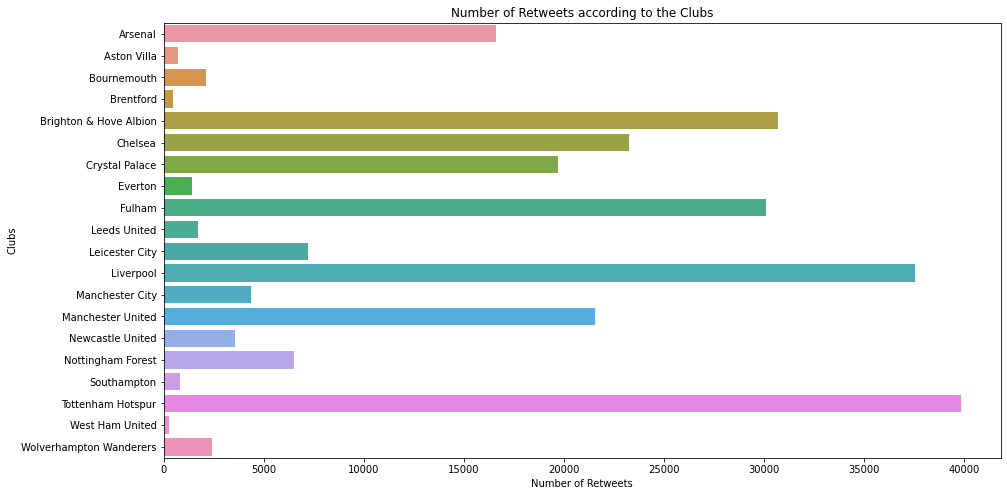

In [72]:
plt.figure(figsize=(15,8))
sns.barplot(data=club_group_sum_df,y='Club_Name',x='retweet_count')
plt.title('Number of Retweets according to the Clubs');
plt.xlabel('Number of Retweets')
plt.ylabel('Clubs');

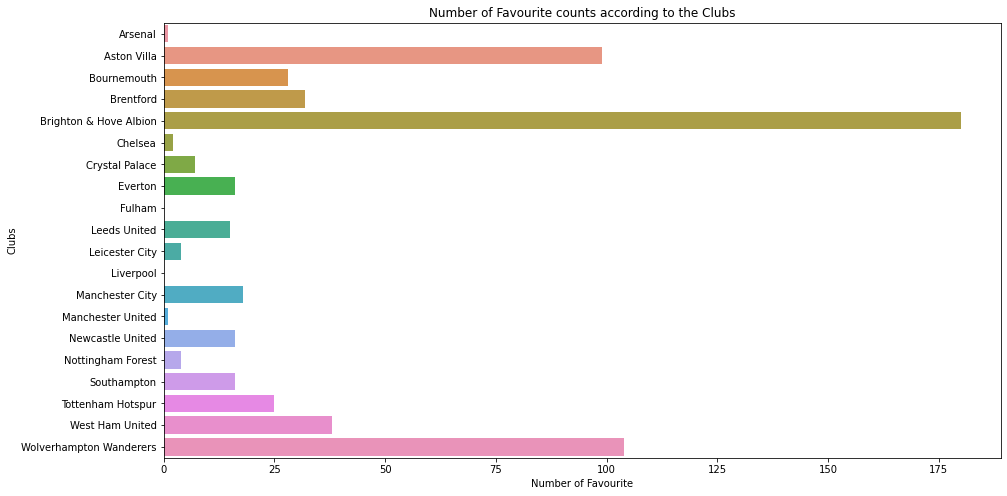

In [73]:
plt.figure(figsize=(15,8))
sns.barplot(data=club_group_sum_df,y='Club_Name',x='favorite_count')
plt.title('Number of Favourite counts according to the Clubs');
plt.xlabel('Number of Favourite')
plt.ylabel('Clubs');

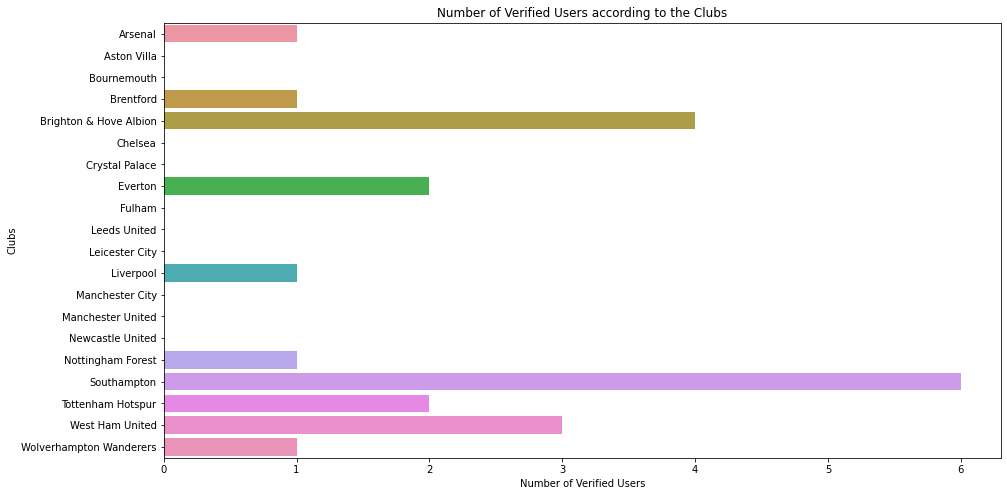

In [77]:
plt.figure(figsize=(15,8))
sns.barplot(data=club_group_sum_df,x='user.verified',y='Club_Name')
plt.title('Number of Verified Users according to the Clubs');
plt.xlabel('Number of Verified Users')
plt.ylabel('Clubs');

In [109]:
merged_df_new_cols['source_update'] = merged_df_new_cols['source'].apply(lambda x: x.split('"nofollow">')[1].split('</a>')[0])

In [110]:
merged_df_new_cols[['source','source_update']]

,source,source_update
0,"<a href=""http://twitter.com/download/iphone"" r...",Twitter for iPhone
1,"<a href=""http://twitter.com/download/iphone"" r...",Twitter for iPhone
2,"<a href=""http://twitter.com/download/iphone"" r...",Twitter for iPhone
3,"<a href=""http://twitter.com/download/iphone"" r...",Twitter for iPhone
4,"<a href=""http://twitter.com/download/android"" ...",Twitter for Android
...,...,...
995,"<a href=""http://twitter.com/download/android"" ...",Twitter for Android
996,"<a href=""http://twitter.com/download/iphone"" r...",Twitter for iPhone
997,"<a href=""http://twitter.com/download/iphone"" r...",Twitter for iPhone
998,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Twitter Web App


In [108]:
merged_df_new_cols['source'][0].split('"nofollow">')[1].split('</a>')[0]

'Twitter for iPhone'

In [ ]:
source_update_counts = merged_df_new_cols.groupby('source_update')

In [ ]:
source_update_counts = source_update_counts.count()
source_update_counts.reset_index(inplace=True)

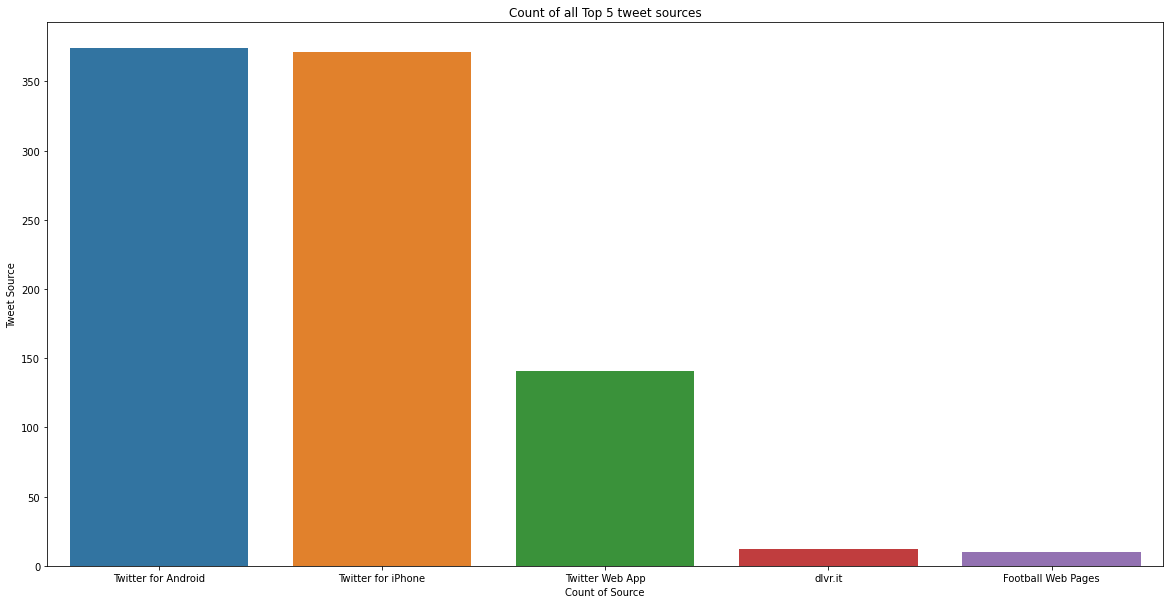

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(data=source_update_counts.sort_values('created_at',ascending=False).head(5),y='created_at',x='source_update')
plt.title('Count of all Top 5 tweet sources')
plt.xlabel('Count of Source')
plt.ylabel('Tweet Source');

End of notebook